# <span style="color:orange;">1.</span> Imports

## <span style="color:orange;">1.1.</span>  Libraries


In [37]:
import pandas              as pd
import seaborn             as sns
import matplotlib.gridspec as gridspec
import scipy.stats         as stats
import numpy               as np
import warnings


from matplotlib              import pyplot as plt
from IPython.core.display    import HTML
from tabulate                import tabulate
from helpers                 import *

# Ignorar os avisos do Matplotlib
warnings.filterwarnings("ignore")

## <span style="color:orange;">1.2.</span> Helper Functions

In [6]:
jupyter_settings()

# <span style="color:orange;">2.0.</span> Exploratory Data Analysis (EDA)


In [7]:
# Importing the data
df = pd.read_csv('../src/data/interim/train_processed_01.csv')

## <span style="color:orange;">2.1.</span> Univariate analysis

### <span style="color:orange;">2.1.2.</span> Response variables

In [8]:
count = pd.DataFrame(df['response'].value_counts())
prop = pd.DataFrame(df['response'].value_counts(normalize=True))

grouped_info = pd.concat([count, prop], axis=1)
round(grouped_info,3)

,count,proportion
response,,
0,334399,0.877
1,46710,0.123


In [9]:
df.dtypes

gender                        object
age                            int64
driving_license                int64
region_code                  float64
previously_insured             int64
vehicle_age                   object
vehicle_damage                 int64
annual_premium               float64
policy_sales_channel         float64
vintage                        int64
response                       int64
hi_customer_profitability    float64
age_binned                    object
dtype: object

### <span style="color:orange;">2.1.2.</span> Numerical variables


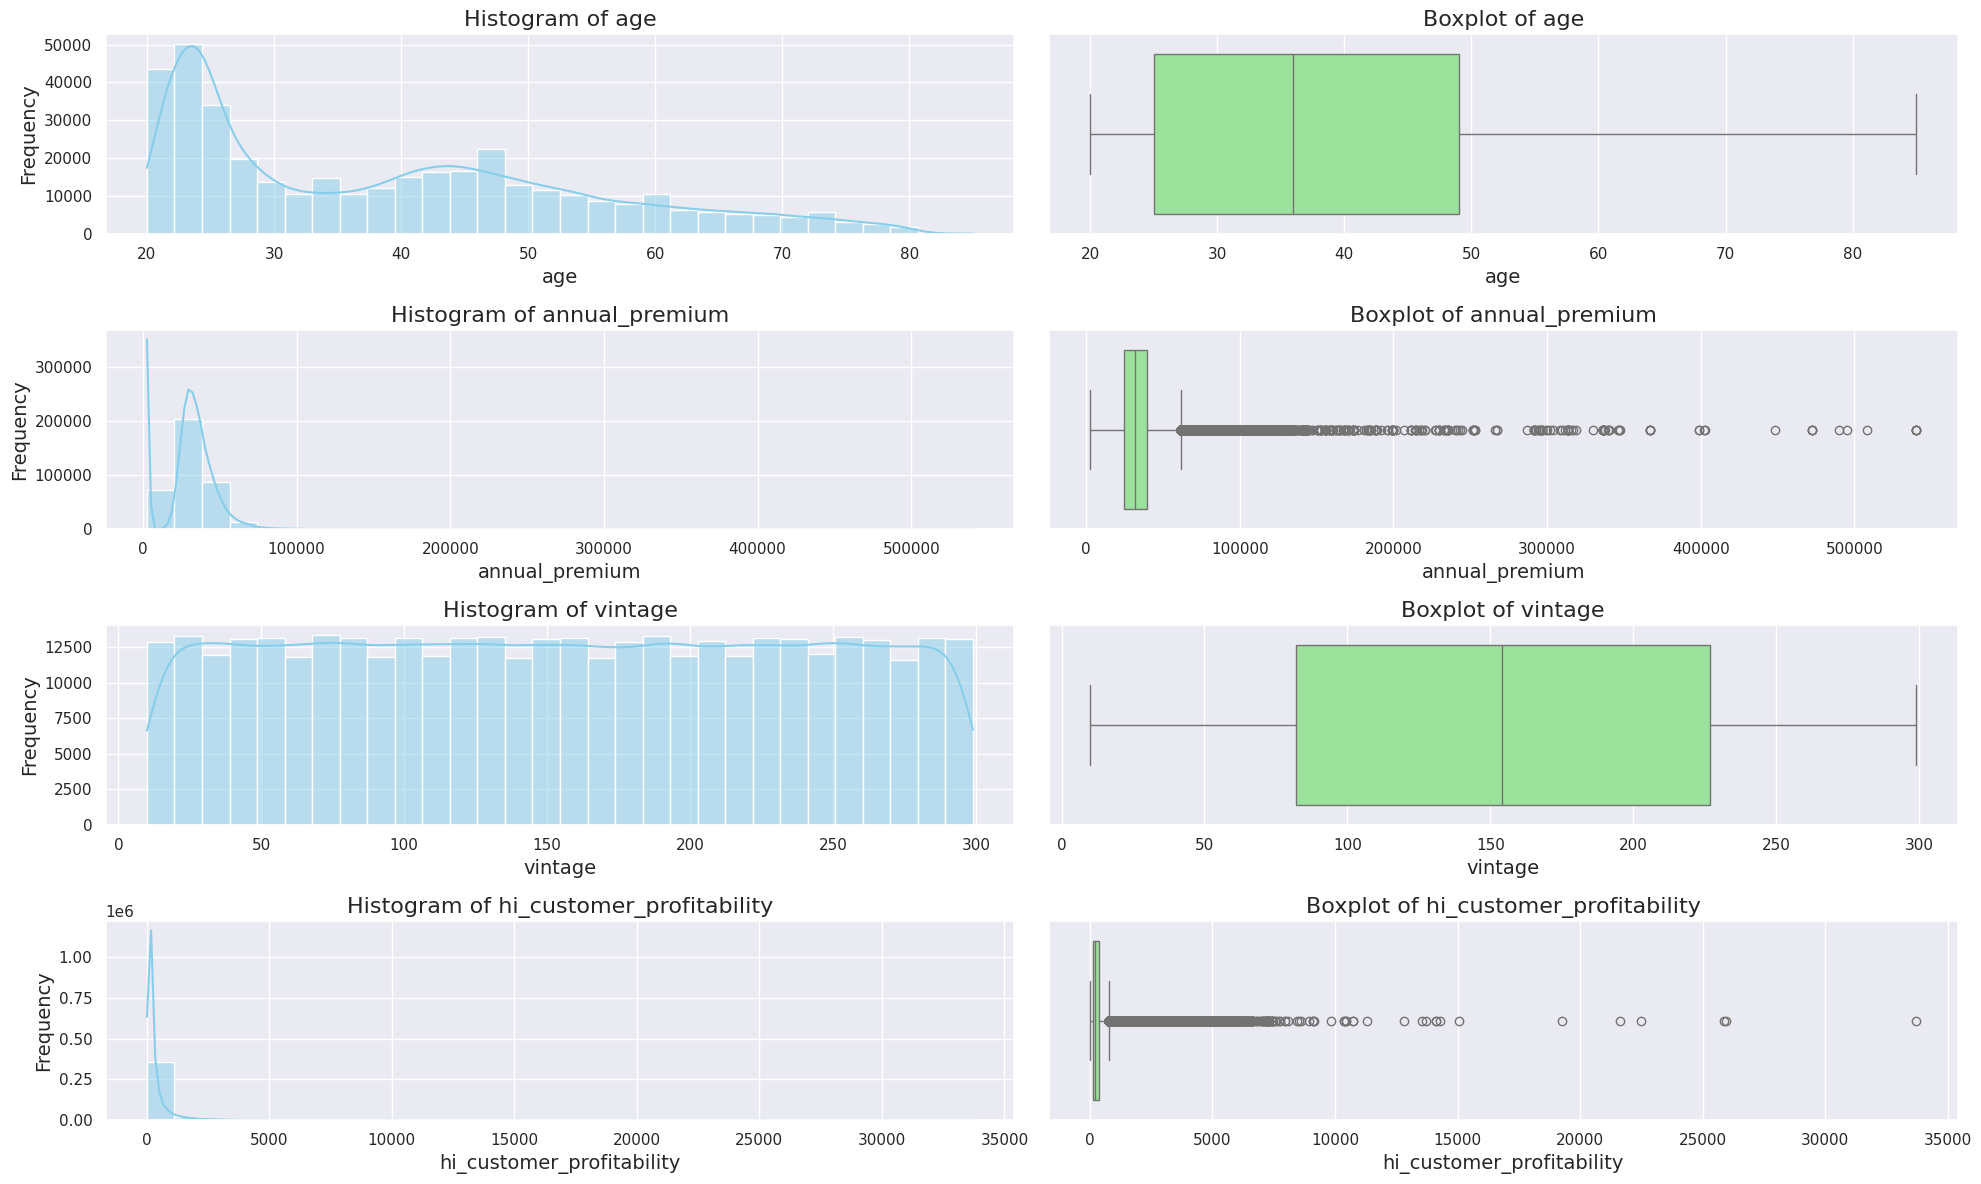

In [10]:
numerical_columns  = ['age', 'annual_premium', 'vintage', 'hi_customer_profitability']

plt.figure(figsize=(20, 12))

# Loop para gerar os gráficos
for i, col in enumerate(numerical_columns):
    # Histograma
    plt.subplot(4, 2, 2*i+1)  # Subplot para histogramas
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Boxplot
    plt.subplot(4, 2, 2*i+2)  # Subplot para boxplots
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)

# Ajustar o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibir o gráfico final
plt.show()

- `annual_premium` and `hi_customer_profitability` have a long tail on the right and outliers, and it is important to consider some approaches to deal with these characteristics.

- `vintage` has a symmetric distribution, close to the uniform, the model may not be able to learn useful patterns from it. Furthermore, including variables that are not informative can increase the complexity of the model without improving its performance. This can lead to overfitting, especially in more complex models.

- `age` shows that most of customers are is relatively young and that there aren't outliers. If the age variable has a non-linear relationship with the target variable, it may be beneficial to apply transformations (such as category creation or binning).

### <span style="color:orange;">2.1.3.</span> Categorical variables

In [11]:
df['region_code'] = df['region_code'].astype('float')
df.dtypes

gender                        object
age                            int64
driving_license                int64
region_code                  float64
previously_insured             int64
vehicle_age                   object
vehicle_damage                 int64
annual_premium               float64
policy_sales_channel         float64
vintage                        int64
response                       int64
hi_customer_profitability    float64
age_binned                    object
dtype: object

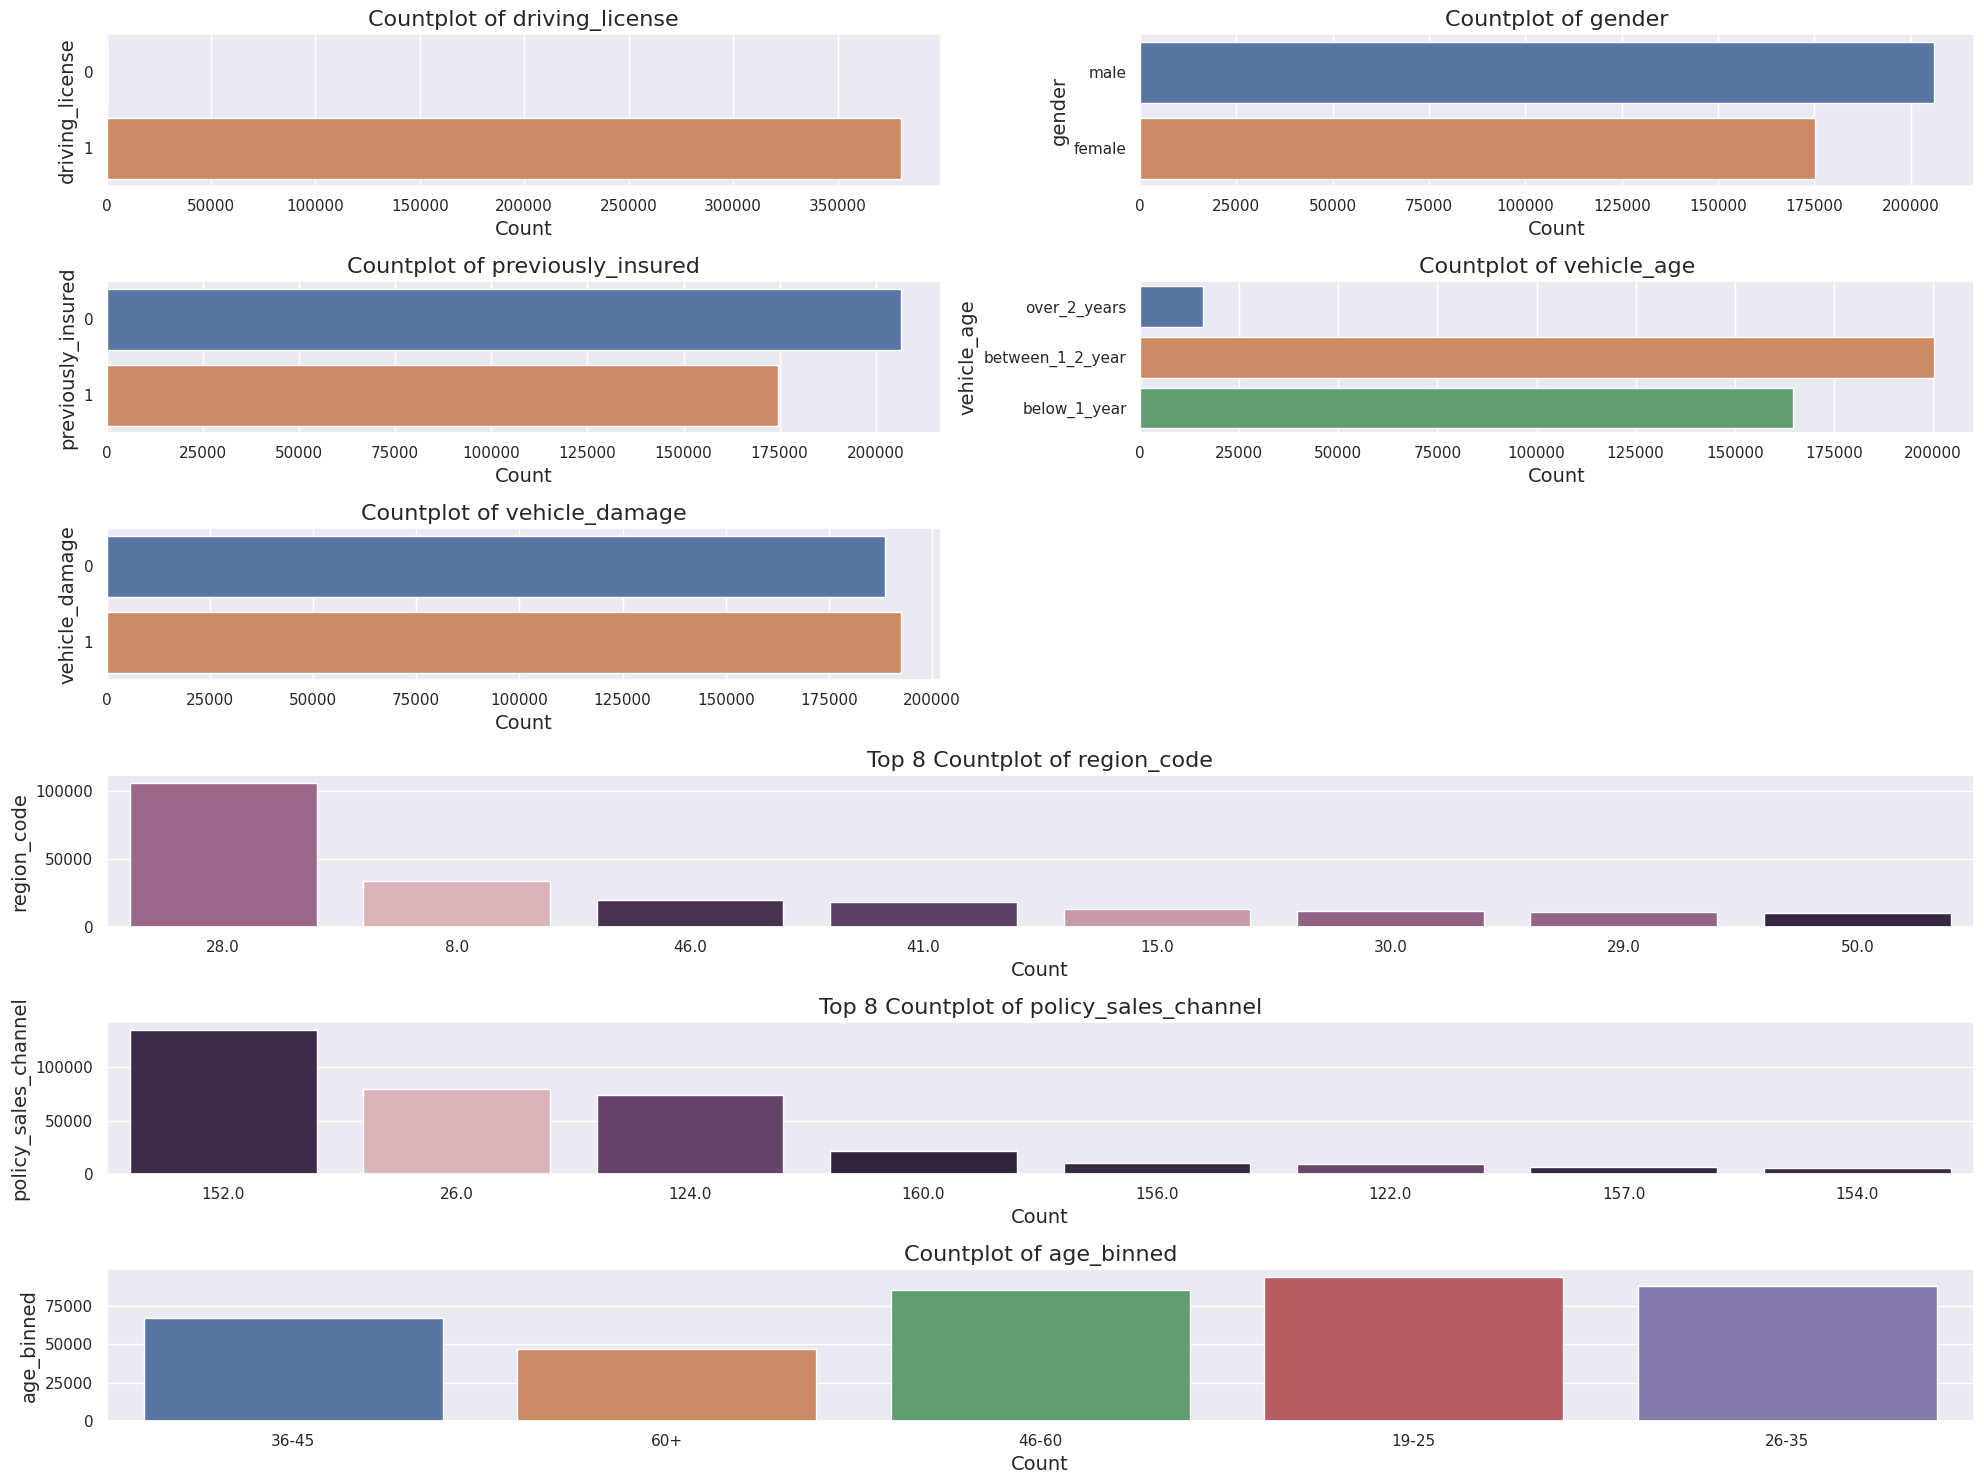

In [12]:
# Obtaining the categorical columns, excluding numerical columns and the response variable
categorical_columns = df.columns.difference(numerical_columns + ['response', 'age_binned', 'region_code',
                                                                 'policy_sales_channel']).tolist()

# Defining the figure and GridSpec
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(6, 2)  # 6 rows, 2 columns

# Loop to generate horizontal countplots for each categorical variable
i = 0

for col in categorical_columns:
    ax = fig.add_subplot(gs[i])  # Create a subplot for each categorical variable

    # Generate a horizontal countplot
    sns.countplot(data=df, y=col, hue=col, ax=ax, legend=False)
    ax.set_title(f'Countplot of {col}', fontsize=16)  # Set the title of the plot
    ax.set_xlabel('Count', fontsize=14)  # Set the x-axis label
    ax.set_ylabel(col, fontsize=14)  # Set the y-axis label
    i += 1

# Adjust the index for the next set of plots
i = 3


for col in ['region_code', 'policy_sales_channel', 'age_binned']:
    ax = fig.add_subplot(gs[i, :])  # Create a subplot for each categorical variable

    if col in ['region_code', 'policy_sales_channel']:
        # Generate a horizontal countplot showing only the top 8 categories
        sns.countplot(data=df, x=col, order=df[col].value_counts().nlargest(8).index, 
                      hue=col, ax=ax, legend=False)  
        ax.set_title(f'Top 8 Countplot of {col}', fontsize=16)  # Set the title indicating top 8
    else:
        # Generate countplot for age_binned without limiting categories
        sns.countplot(data=df, x=col, hue=col, ax=ax, legend=False)
        ax.set_title(f'Countplot of {col}', fontsize=16)  # Set the title of the plot

    ax.set_xlabel('Count', fontsize=14)  # Set the x-axis label
    ax.set_ylabel(col, fontsize=14)  # Set the y-axis label
    i += 1

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Display the final plot
plt.show()


## <span style="color:orange;">2.2.</span> Bivariate analysis

### H1. Different policy sales channel of health insurance doesn't change the vehicle insurance interest

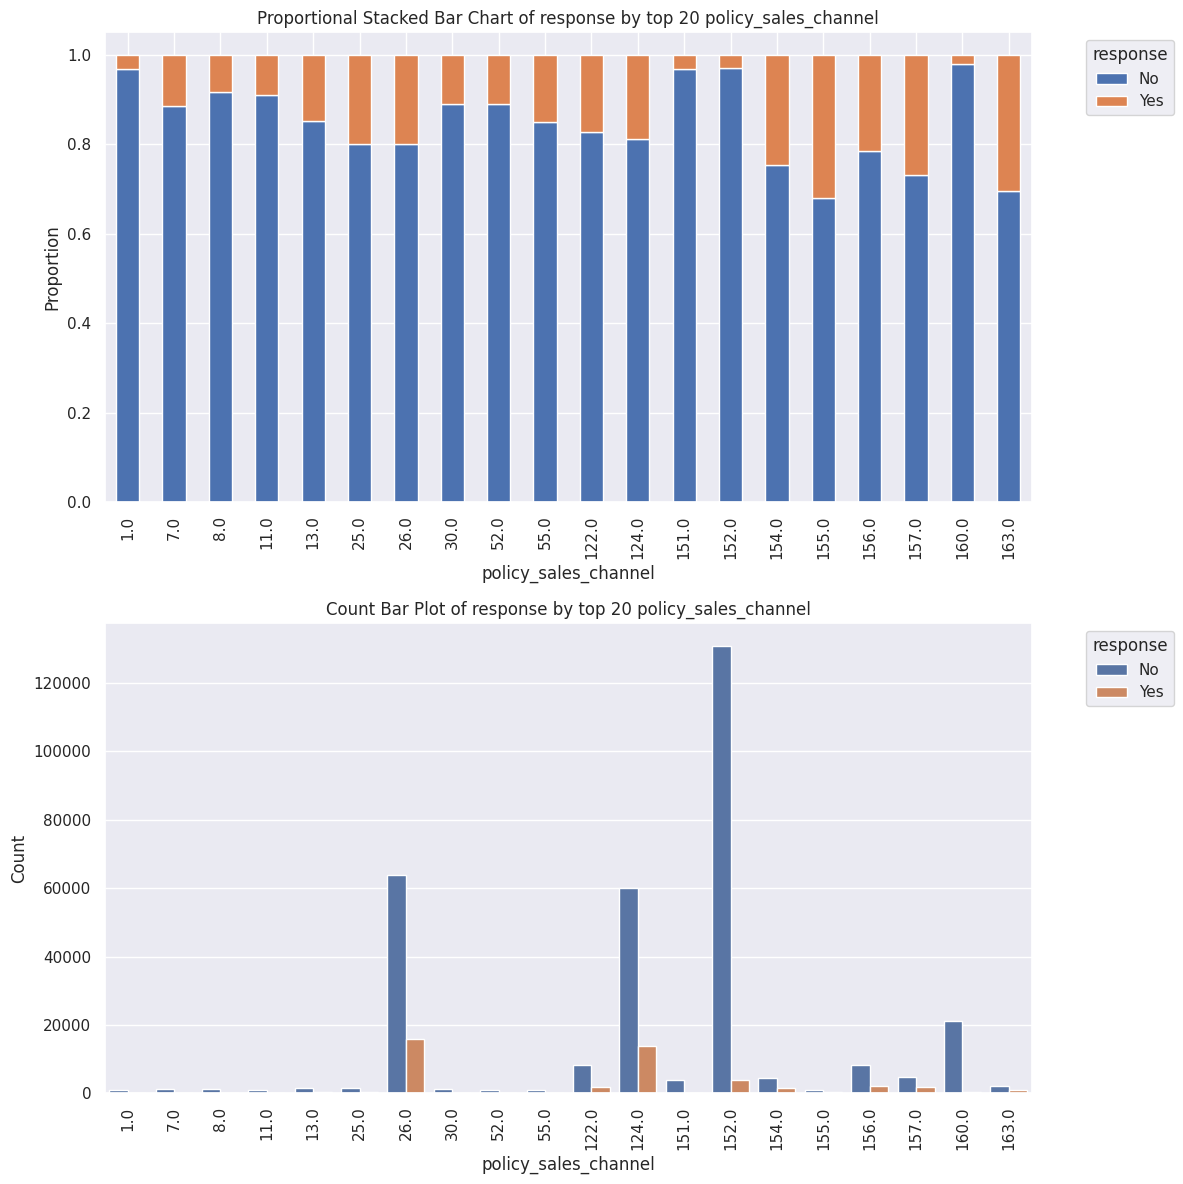

In [13]:
plot_insurance_interest_by_categorical_variable(df, 'response', 'policy_sales_channel', topk=20)

- **False**: From the graphs it can be seen that different policy sales channel of health insurance change the vehicle insurance interest.

### H2. The higher vintage on health insurance, the greater the interest in vehicle insurance

In [14]:
df.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,hi_customer_profitability,age_binned
0,male,44,1,28.0,0,over_2_years,1,40454.0,26.0,217,1,186.423963,36-45
1,male,76,1,3.0,0,between_1_2_year,0,33536.0,26.0,183,0,183.256831,60+
2,male,47,1,28.0,0,over_2_years,1,38294.0,26.0,27,1,1418.296296,46-60
3,male,21,1,11.0,1,below_1_year,0,28619.0,152.0,203,0,140.980296,19-25
4,female,29,1,41.0,1,below_1_year,0,27496.0,152.0,39,0,705.025641,26-35


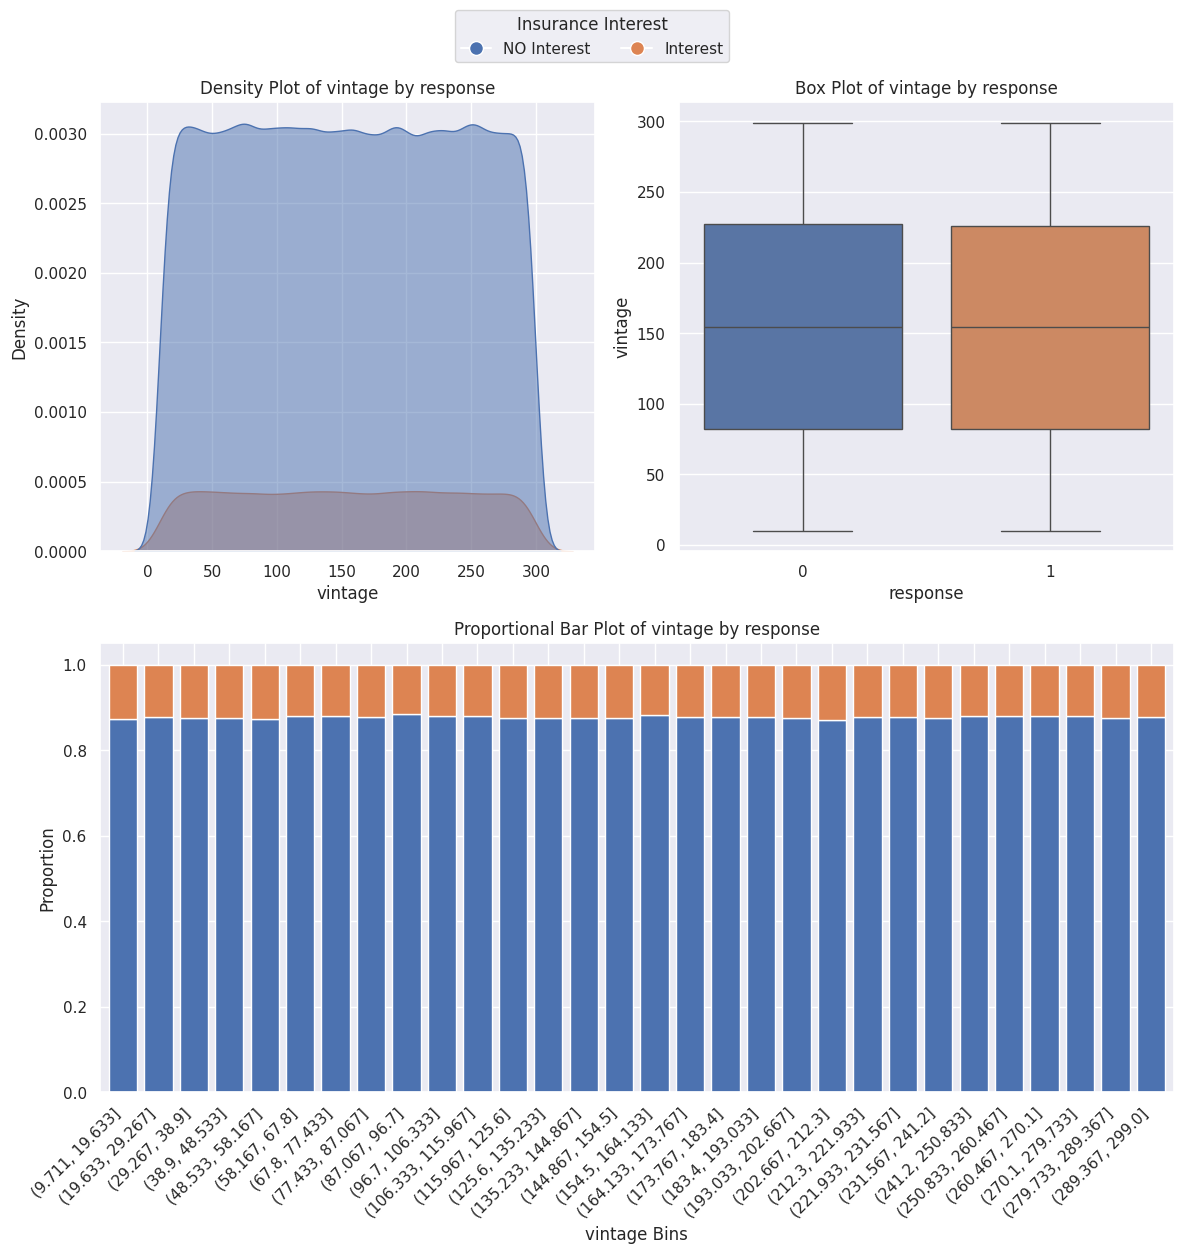

In [15]:
plot_insurance_interest_by_numerical_variable(df, dependent_var='response', independent_var='vintage')

In [16]:
# Grouping data
annual_premium_group_0 = df[df['response'] == 0]['annual_premium']
annual_premium_group_1 = df[df['response'] == 1]['annual_premium']

# Perform the t-test
stats.mannwhitneyu(annual_premium_group_1, annual_premium_group_0)

MannwhitneyuResult(statistic=8276108644.5, pvalue=9.141297555609242e-98)

In [17]:
# Grouping data
vintage_group_0 = df[df['response'] == 0]['vintage']
vintage_group_1 = df[df['response'] == 1]['vintage']

# Shapiro-Wilk test to check normality
shapiro_group_0 = stats.shapiro(vintage_group_0)
shapiro_group_1 = stats.shapiro(vintage_group_1)

print("Shapiro-Wilk Test Group 0:", shapiro_group_0)
print("Shapiro-Wilk Test Group 1:", shapiro_group_1)

# Levene's test for homogeneity of variances
levene_test = stats.levene(vintage_group_0, vintage_group_1)
print("Levene's Test:", levene_test)

Shapiro-Wilk Test Group 0: ShapiroResult(statistic=0.9550432562828064, pvalue=0.0)
Shapiro-Wilk Test Group 1: ShapiroResult(statistic=0.955053448677063, pvalue=0.0)
Levene's Test: LeveneResult(statistic=0.011226229311164487, pvalue=0.915618983034847)


The data in the 2 groups do not follow a normal distribution, as indicated by the **Shapiro-Wilk** results. However, homoscedasticity was confirmed by **Levene's test**, suggesting that the variances of the groups are equal. 

**Hypothesis Testing**

**Null Hypothesis (H0)**: The distributions of `vintage` for individuals interested in vehicle insurance and those not interested in vehicle insurance are equal.

**Alternative Hypothesis (H1)**: The distribution of `vintage` for individuals interested in vehicle insurance differs from the distribution of `vintage` for individuals not interested in vehicle insurance.

In [18]:
# Perform the t-test
stats.mannwhitneyu(vintage_group_1, vintage_group_0)

MannwhitneyuResult(statistic=7795432490.0, pvalue=0.516300989577035)

**False** – The p-value of 0.516 indicates that there is insufficient statistical evidence to reject the null hypothesis (H0). This suggests that the distributions of vintage for individuals interested in vehicle insurance and those not interested in vehicle insurance are statistically equivalent.

### H3. The higher annual premium price on health insurance, the lower the interest on vehicle insurance

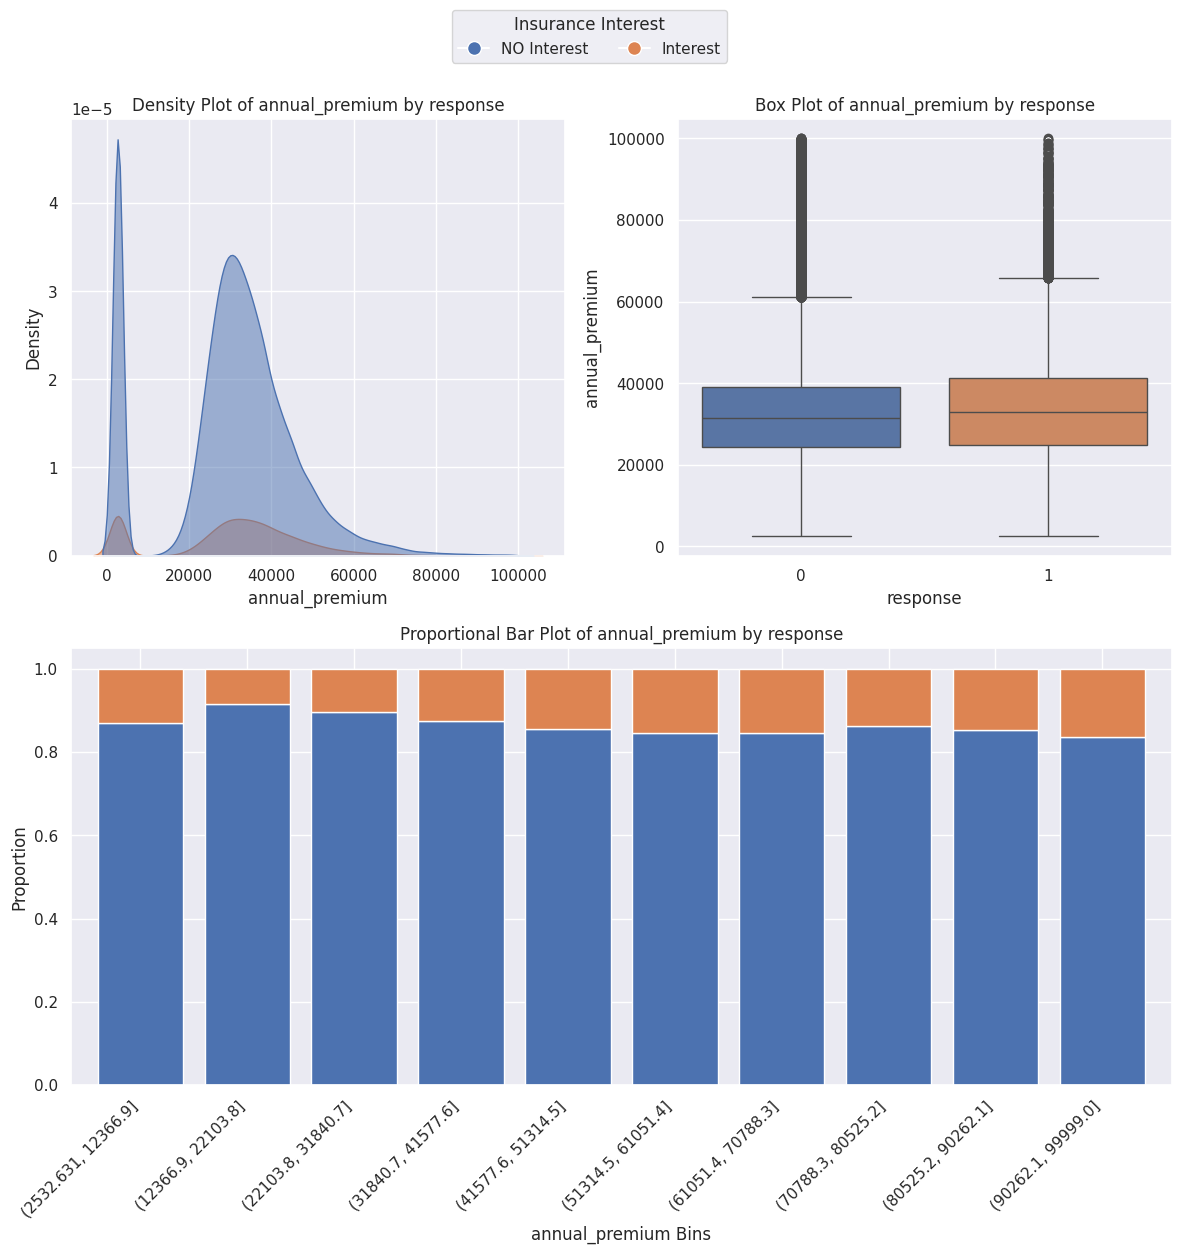

In [19]:
plot_insurance_interest_by_numerical_variable(df[df['annual_premium'] < 100000], dependent_var='response', independent_var='annual_premium', bins=10)

- **True**. There are two peaks of interest in car insurance, both for annual_premium values ​​lower than 50000. For higher values ​​the interest in car insurance approaches 0.

### H4. Older customers have less interest on vehicle insurance

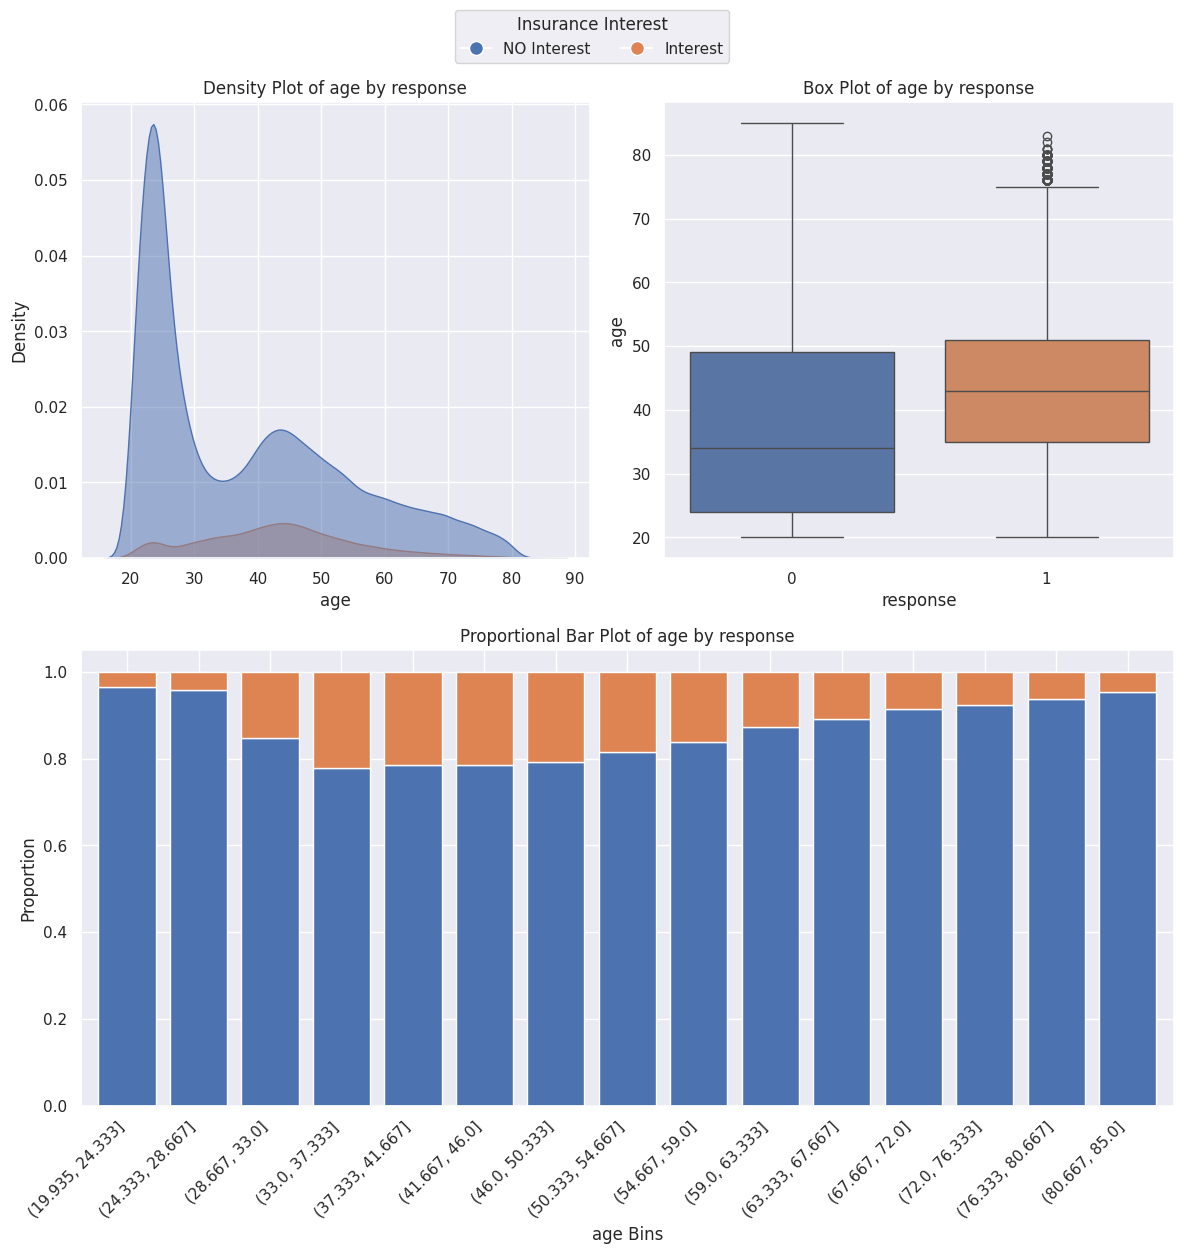

In [20]:
plot_insurance_interest_by_numerical_variable(df, dependent_var='response', independent_var='age', bins=15)

- **False**: The data suggests that, on average, customers aged between 40 and 50 show a peak interest in car insurance, contradicting the claim that older customers are less interested.

### H5. There isn't a difference between genders when comparing the vehicle insurance interest

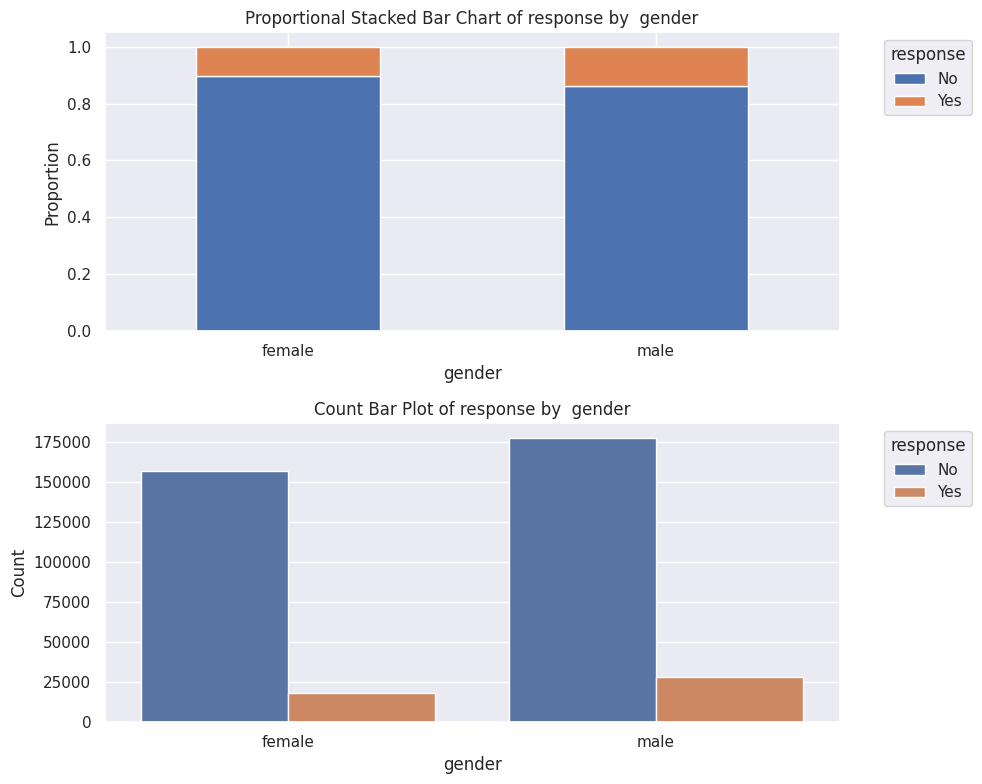

In [21]:
plot_insurance_interest_by_categorical_variable(df, 'response', 'gender', figsize=(10, 8))

In [22]:
#Generate the crosstab table
(pd.crosstab(df['response'], df['gender'], normalize='index')*100).round(2)

gender,female,male
response,,
0,46.90,53.10
1,38.93,61.07


- **False**: On average, men are a little more interested than women in vehicle insurance.

### H6. People who have a driver's license are more likely to purchase car insurance.

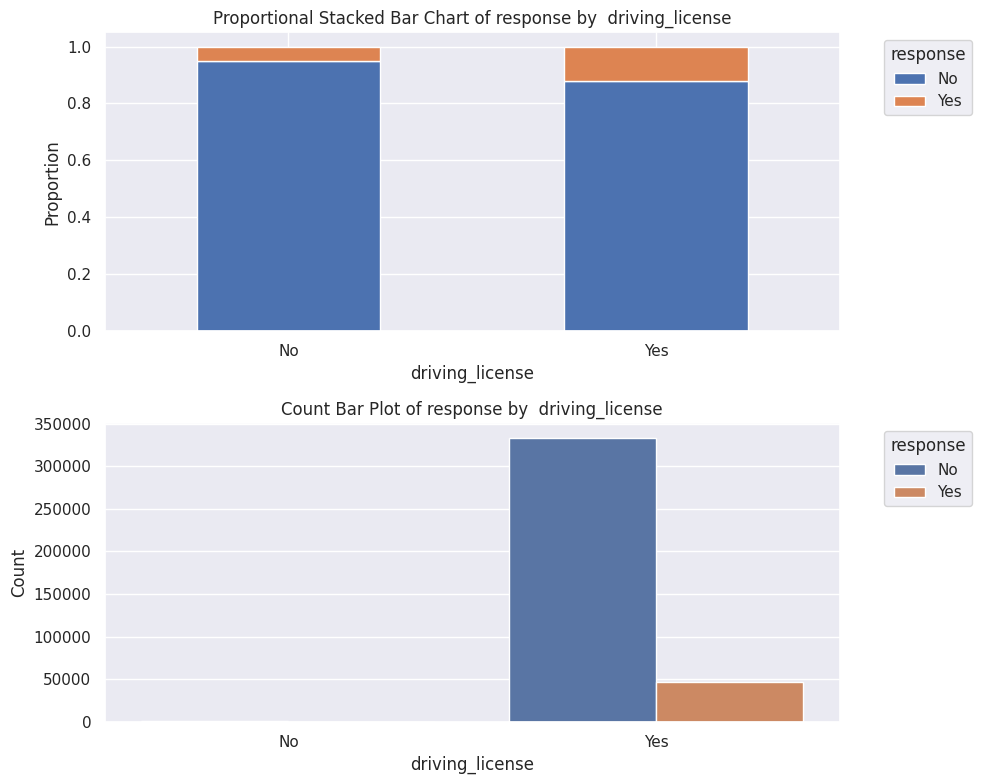

In [23]:
aux = df.copy()
aux['driving_license'] = aux['driving_license'].map({0: 'No', 1: 'Yes'})

plot_insurance_interest_by_categorical_variable(aux, 'response', 'driving_license', figsize=(10, 8))

In [24]:
pd.crosstab(df['response'].map({0: 'No', 1: 'Yes'}), df['driving_license'].map({0: 'No', 1: 'Yes'}))

driving_license,No,Yes
response,,
No,771,333628
Yes,41,46669


In [25]:
# Generate the normalized crosstab table
(pd.crosstab(df['response'].map({0: 'No', 1: 'Yes'}), df['driving_license'], normalize='columns')*100).round(2)

driving_license,0,1
response,,
No,94.95,87.73
Yes,5.05,12.27


- Only 41 people without a driver's license are interested in vehicle insurance.

- **True**: 12.27% of people who have a car license are interested in vehicle insurance, while 5.05% of people who do not have a car license are interested in vehicle insurance.

### H7. There is a difference in interest in car insurance depending on the region where the person lives.

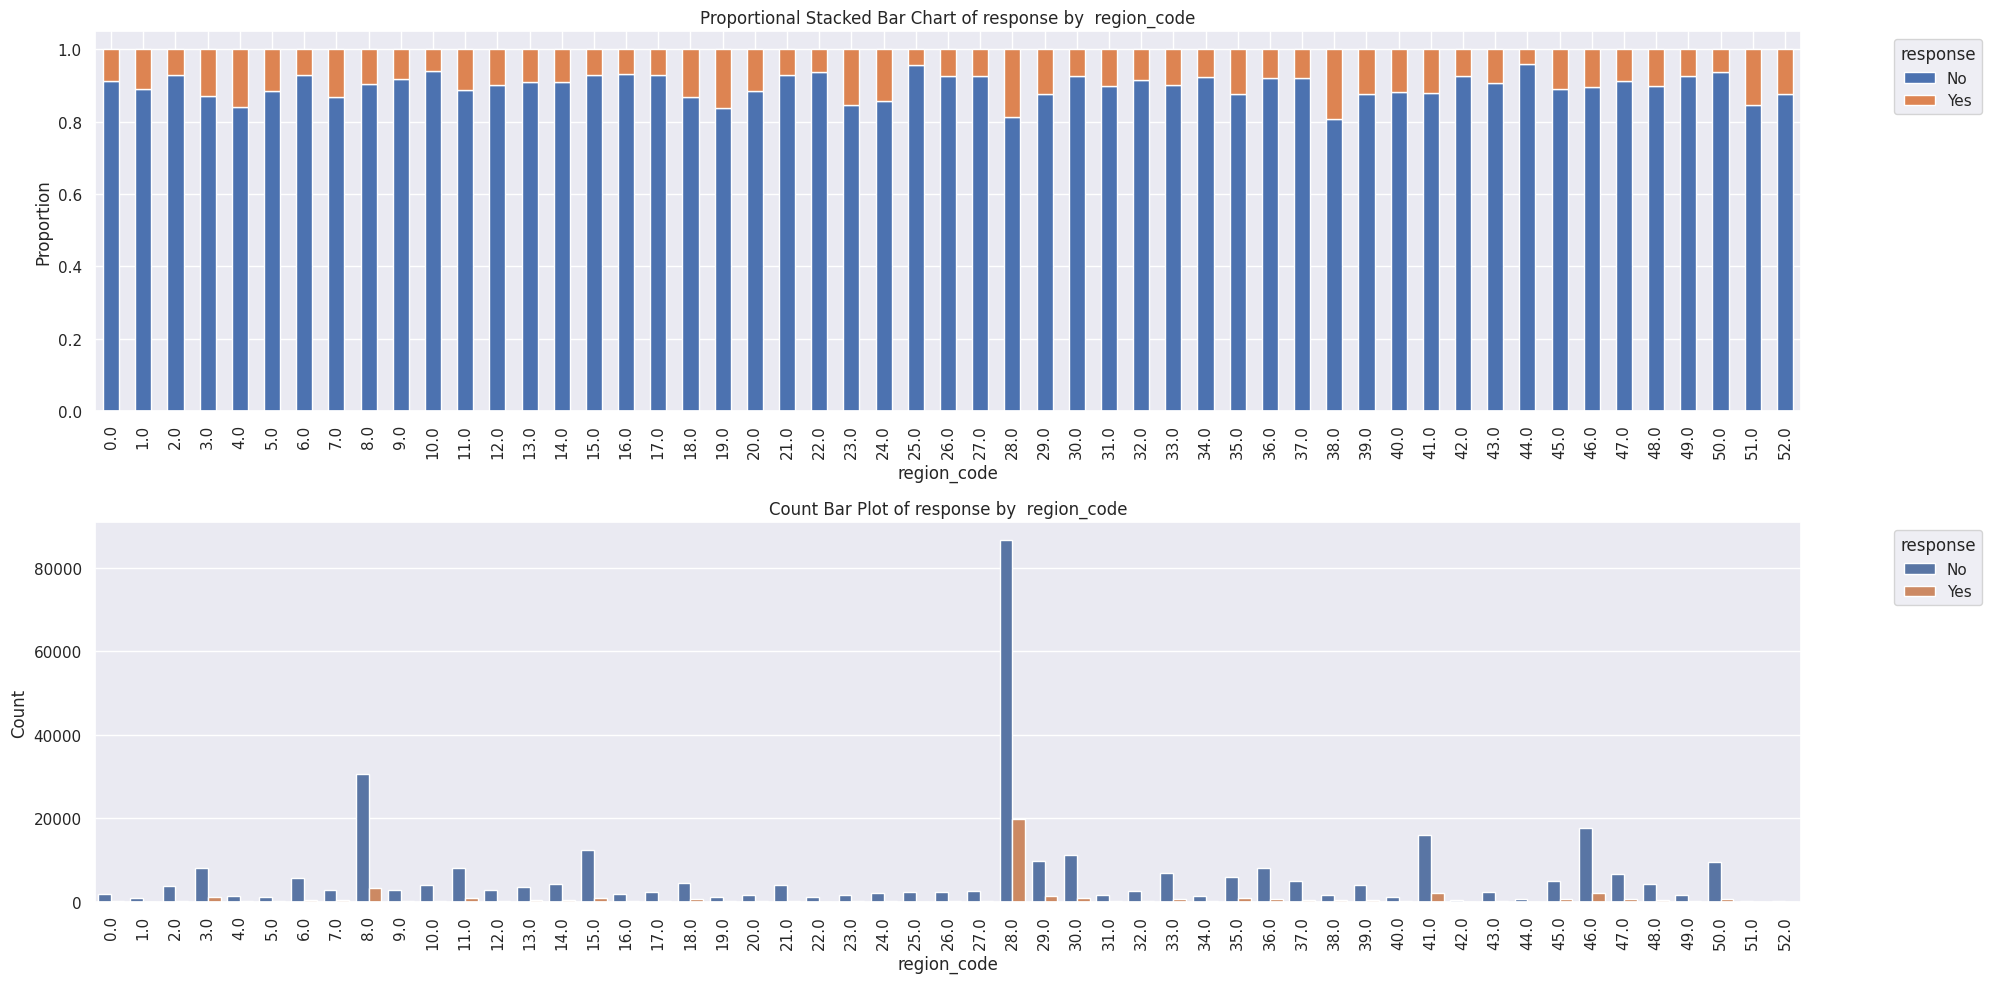

In [26]:
plot_insurance_interest_by_categorical_variable(df, 'response', 'region_code', figsize=(20, 10))

In [27]:
(pd.crosstab(df['region_code'], df['response'].map({0: 'No', 1: 'Yes'}), normalize='index')*100).round(2).sort_values(by='Yes', ascending=False)

response,No,Yes
region_code,,
38.0,80.80,19.20
28.0,81.28,18.72
19.0,83.71,16.29
4.0,84.18,15.82
23.0,84.69,15.31
51.0,84.70,15.30
24.0,85.84,14.16
7.0,86.83,13.17
18.0,86.84,13.16


- **True** There is a difference in interest in car insurance between regions, with region 28 having the most people interested in absolute numbers and region 38 having the most people interested in relative numbers.

### H8. Customers who already have vehicle insurance are less interested in purchasing new vehicle insurance.

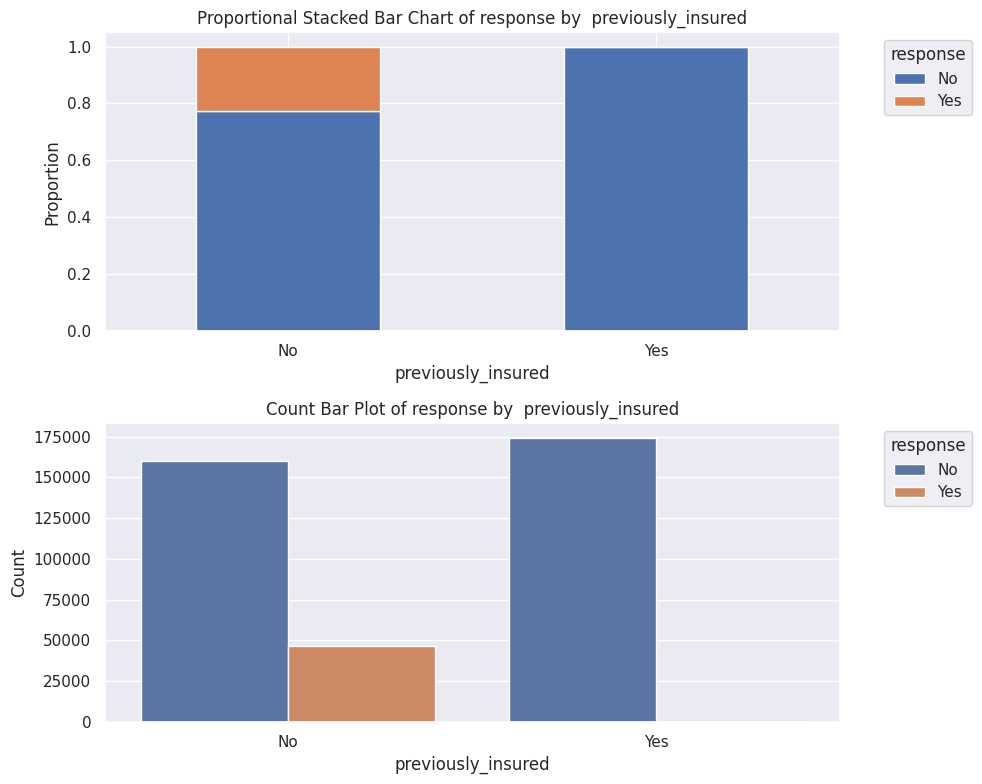

In [28]:
aux = df.copy()
aux['previously_insured'] = aux['previously_insured'].map({0: 'No', 1: 'Yes'})

plot_insurance_interest_by_categorical_variable(aux, 'response', 'previously_insured', figsize=(10, 8))

In [29]:
(pd.crosstab(df['response'].map({0: 'No', 1: 'Yes'}), df['previously_insured'].map({0: 'No', 1: 'Yes'}), normalize='columns')*100).round(2)

previously_insured,No,Yes
response,,
No,77.45,99.91
Yes,22.55,0.09


**True**: Only 0.09 % of people who was previously_insured is interested in car insurance, while 22.55 % of people who was not previously_insured is interested in car insurance

### H9. On average, Customers with older vehicle have less interest on vehicle insurance.

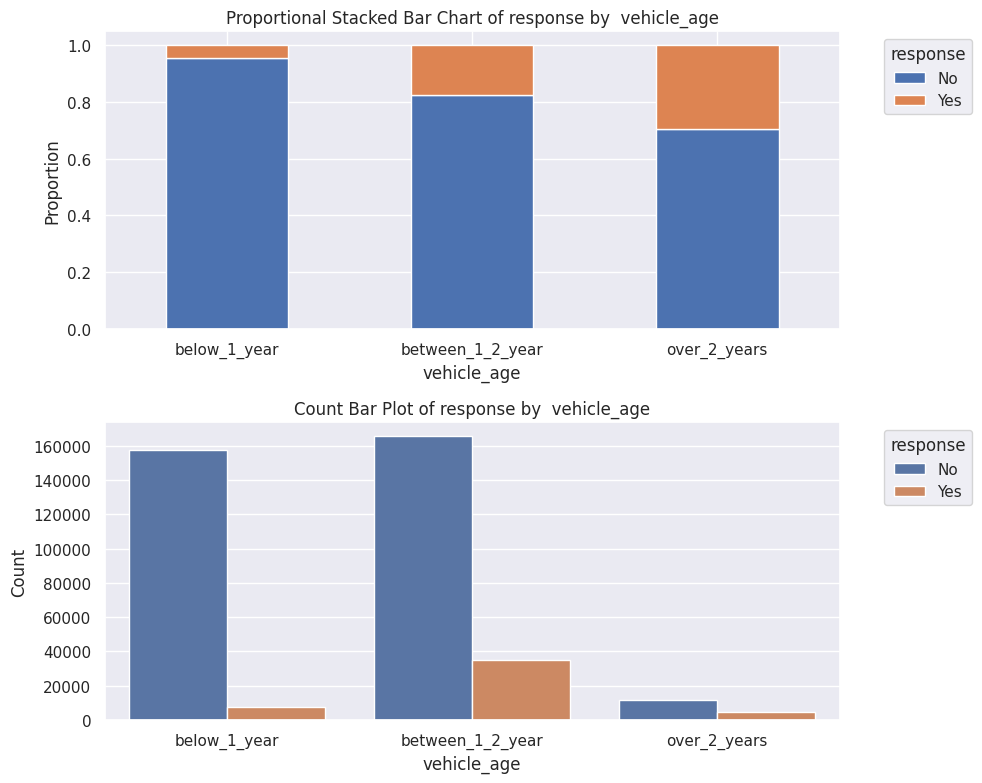

In [30]:
plot_insurance_interest_by_categorical_variable(aux, 'response', 'vehicle_age', figsize=(10, 8))

In [31]:
(pd.crosstab(df['response'].map({0: 'No', 1: 'Yes'}), df['vehicle_age'], normalize='index')*100).round(2)

vehicle_age,below_1_year,between_1_2_year,over_2_years
response,,,
No,47.12,49.49,3.38
Yes,15.42,74.52,10.07


**False**: On average there are more people interested in vehicle insurance that have older vehicles, but in absolute values tere are more people interest in vahicle insure who have cars wit age between 1 and 2 years.

### H10. On average, If the vehicle has been damaged, then the vehicle insurance interest is greater.

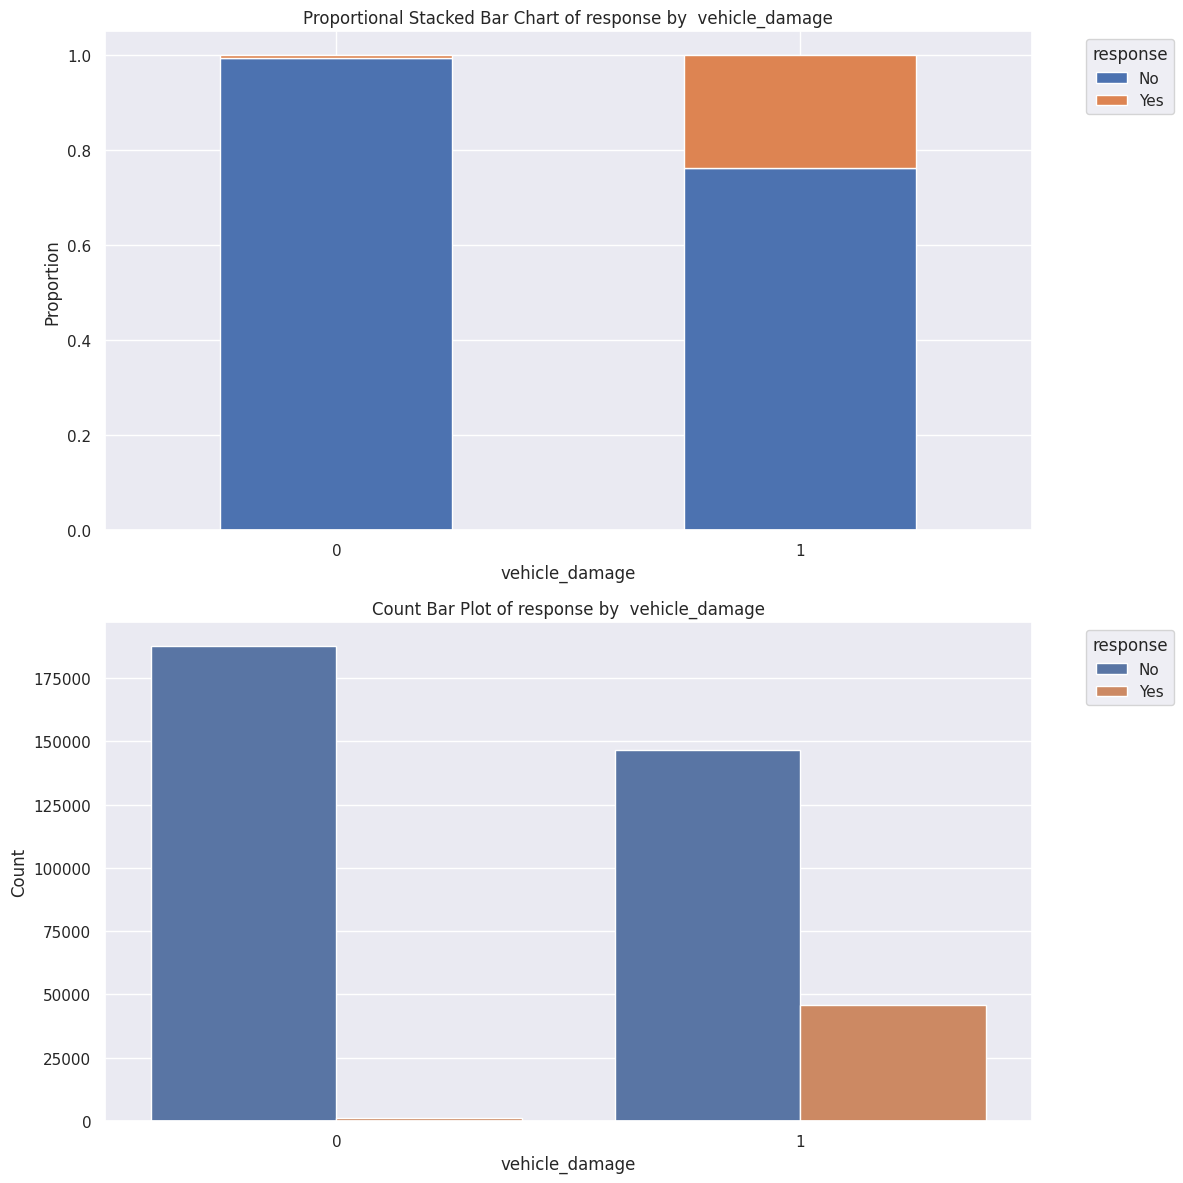

In [32]:
plot_insurance_interest_by_categorical_variable(df, 'response', 'vehicle_damage')

In [33]:
(pd.crosstab(df['response'].map({0: 'No', 1: 'Yes'}), df['vehicle_damage'].map({0: 'No', 1: 'Yes'}), normalize='index')*100).round(2)

vehicle_damage,No,Yes
response,,
No,56.13,43.87
Yes,2.10,97.90


**True** On average people who have already got his vehicle damaged are more interested in vehicle insurance.

### <span style="color:orange;">2.2.1.</span> Summary of Hypotheses

In [34]:
tab =[['Hypotheses', 'Conclusion'],
      ['H1', 'False' ],
      ['H2', 'False'],
      ['H3', 'True'],
      ['H4', 'False'],
      ['H5', 'False'],
      ['H6', 'True'],
      ['H7', 'True'],
      ['H8', 'True'],
      ['H9', 'False'],
      ['H10', 'True']
     ]  
print( tabulate( tab, headers='firstrow' ) )

Hypotheses    Conclusion
------------  ------------
H1            False
H2            False
H3            True
H4            False
H5            False
H6            True
H7            True
H8            True
H9            False
H10           True


## <span style="color:orange;">2.3</span> Multivariate Analysis

### <span style="color:orange;">2.3.1</span> Numerical Attributes

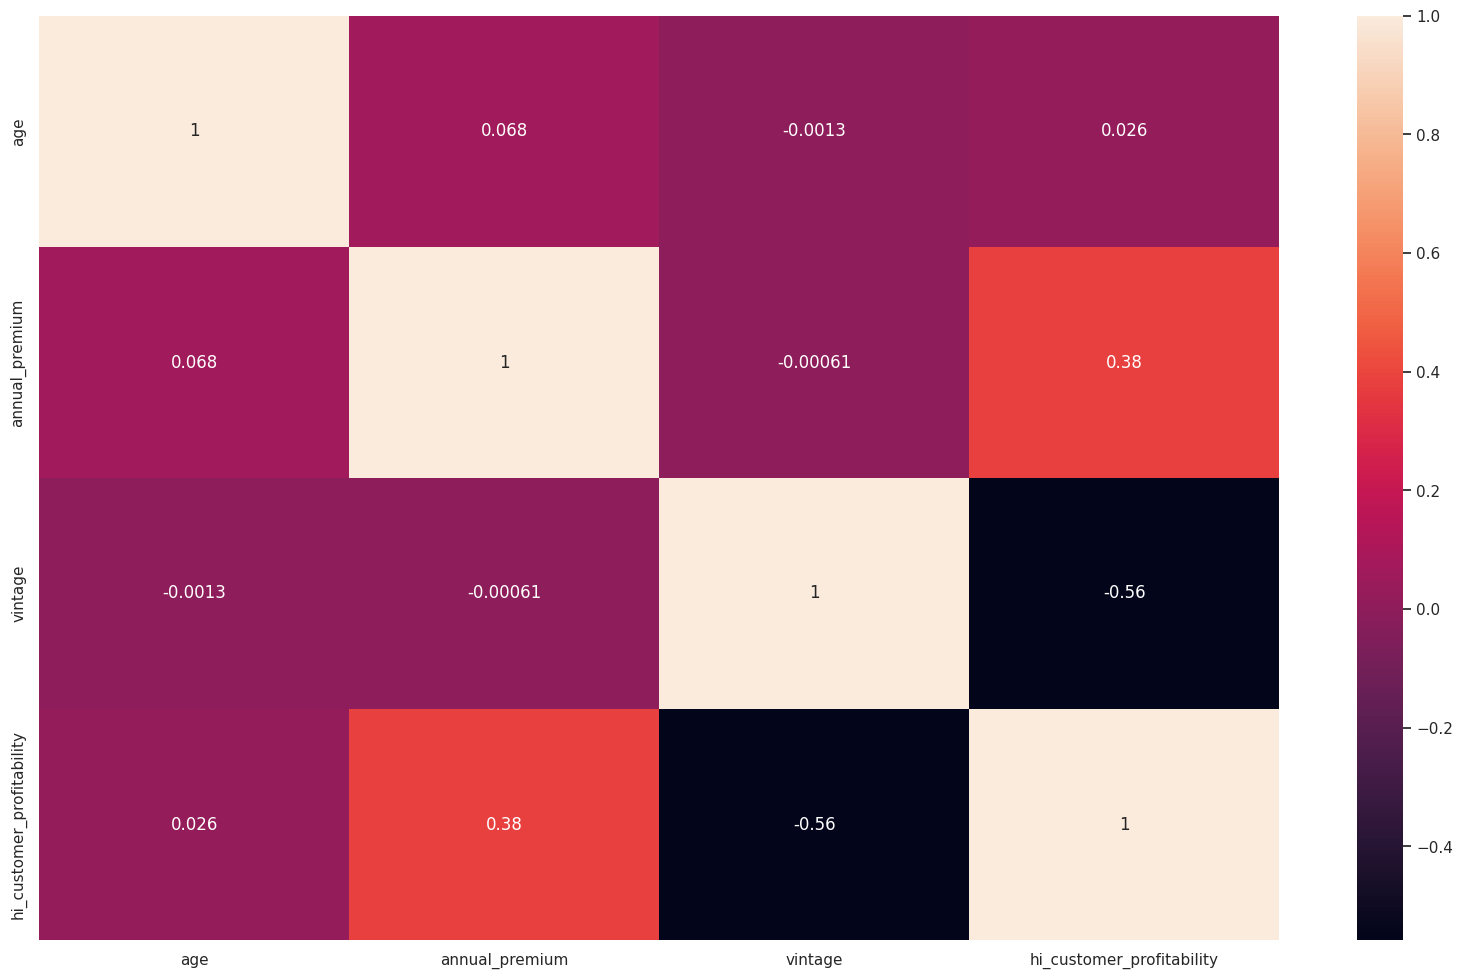

In [35]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot()
 
# plotting a triangle correlation heatmap
sns.heatmap(df[numerical_columns].corr(method='pearson'), annot=True, ax=ax);

Low correlation between other variables and an expected correlation between `hi_customer_profitability` vs `annual_premium` and vs `vintage`.

### <span style="color:orange;">2.3.2</span> Categorical Attributes

In [36]:
df[df.columns.difference(numerical_columns)].head()

,age_binned,driving_license,gender,policy_sales_channel,previously_insured,region_code,response,vehicle_age,vehicle_damage
0,36-45,1,male,26.0,0,28.0,1,over_2_years,1
1,60+,1,male,26.0,0,3.0,0,between_1_2_year,0
2,46-60,1,male,26.0,0,28.0,1,over_2_years,1
3,19-25,1,male,152.0,1,11.0,0,below_1_year,0
4,26-35,1,female,152.0,1,41.0,0,below_1_year,0
